<a href="https://colab.research.google.com/github/teij04/AITensorFlow/blob/master/Copy_of_Conolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(512, 512)
Tensor("Reshape_15:0", shape=(1, 512, 512, 1), dtype=float32)
[100, 100, 1, 1]


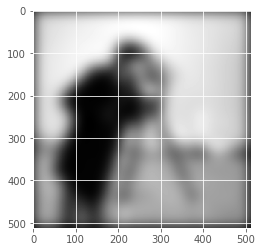

In [0]:
from skimage import data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = tf.linspace(-3.0, 3.0, 100)

sess = tf.InteractiveSession()
x.eval()

mean = 0.0
sigma = 1.0

z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

ksize = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

# but since we'll be using tensorflow, we can use the tensorflow reshape function:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()

plt.imshow(res[0, :, :, 0], cmap='gray')